In [1]:
# import the required software libraries
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [2]:
# https://gml.noaa.gov/ccgg/trends/data.html
mauna_loa = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv', skiprows=43)

In [3]:
cols = ['year', 'co2_ppm', 'unc']

In [4]:
# https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/
mauna_loa.columns = cols

In [5]:
mauna_loa['years_before_present'] = 2023 - mauna_loa['year']

In [6]:
mauna_loa

,year,co2_ppm,unc,years_before_present
0,1959,315.98,0.12,64
1,1960,316.91,0.12,63
2,1961,317.64,0.12,62
3,1962,318.45,0.12,61
4,1963,318.99,0.12,60
...,...,...,...,...
59,2018,408.72,0.12,5
60,2019,411.65,0.12,4
61,2020,414.21,0.12,3
62,2021,416.41,0.12,2


In [7]:
# data = pd.read_excel('https://static-content.springer.com/esm/art%3A10.1038%2Fnature06949/MediaObjects/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='all records')

In [8]:
master_data = pd.read_excel('grl52461-sup-0003-supplementary.xls', sheet_name='all records')

In [9]:
rubino = master_data.iloc[90:, [83, 86]]

In [10]:
rubino.rename(columns=({'Unnamed: 83':'yr_bp', 'Unnamed: 86':'co2_ppmv'}), inplace=True)

In [11]:
def year(sample):
    sample['year'] = 1950-(sample['yr_bp'])
    sample['years_before_present'] = 2023 - sample['year']
    sample.dropna(axis=0, inplace=True)
    return sample

In [12]:
year(rubino)

,yr_bp,co2_ppmv,year,years_before_present
90,-8.562971,316.33402,1958.562971,64.437029
91,-8.102786,316.101403,1958.102786,64.897214
92,-7.872424,314.572166,1957.872424,65.127576
93,-7.257539,315.270355,1957.257539,65.742461
94,-7.203374,316.32538,1957.203374,65.796626
...,...,...,...,...
333,1675.55608,280.244492,274.44392,1748.55608
334,1683.90469,278.3144,266.09531,1756.90469
335,1709.3986,280.249087,240.6014,1782.3986
336,1775.46638,277.555892,174.53362,1848.46638


In [13]:
macfarling = master_data.iloc[137:, 68:70]

In [14]:
macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'yr_bp', 'Unnamed: 69':'co2_ppmv'}), inplace=True)

In [15]:
year(macfarling)

,yr_bp,co2_ppmv,year,years_before_present
137,1814,278.1,136,1887
138,1846,277.5,104,1919
139,1894,277.4,56,1967
140,1920,277.9,30,1993
141,1949,276.7,1,2022


In [16]:
monnin = master_data.iloc[25:120, 2:4]

In [17]:
monnin.rename(columns=({'Unnamed: 2':'yr_bp', 'Unnamed: 3':'co2_ppmv'}), inplace=True)

In [18]:
year(monnin)

,yr_bp,co2_ppmv,year,years_before_present
25,1999.709091,278,-49.709091,2072.709091
26,2093.359091,276.9,-143.359091,2166.359091
27,2234.235273,276.7,-284.235273,2307.235273
28,2265.549333,276.7,-315.549333,2338.549333
29,2414.316667,277.6,-464.316667,2487.316667
...,...,...,...,...
115,11161.063636,264.8,-9211.063636,11234.063636
116,11185.870909,265,-9235.870909,11258.870909
117,11200.576364,265.3,-9250.576364,11273.576364
118,11256.567879,264.4,-9306.567879,11329.567879


In [19]:
marcott = master_data.iloc[31:321, 98:100]

In [20]:
marcott.rename(columns=({'Unnamed: 98':'yr_bp', 'Unnamed: 99':'co2_ppmv'}), inplace=True)

In [21]:
year(marcott)

,yr_bp,co2_ppmv,year,years_before_present
31,11339.371,268.806251,-9389.371,11412.371
32,11383.156,268.839634,-9433.156,11456.156
33,11399.861,272.163883,-9449.861,11472.861
34,11417.453,268.483139,-9467.453,11490.453
35,11435.931,274.143459,-9485.931,11508.931
...,...,...,...,...
316,21562.853,189.226053,-19612.853,21635.853
317,21790.593,191.957177,-19840.593,21863.593
318,21913.629,194.782504,-19963.629,21986.629
319,22055.594,191.38114,-20105.594,22128.594


In [22]:
ahn = master_data.iloc[7:202, 89:91]

In [23]:
ahn.rename(columns=({'Unnamed: 89':'yr_bp', 'Unnamed: 90':'co2_ppmv'}), inplace=True)

In [24]:
year(ahn)

,yr_bp,co2_ppmv,year,years_before_present
7,22292.2,187.224212,-20342.2,22365.2
8,22347.6,187.021647,-20397.6,22420.6
9,22550.1,184.679218,-20600.1,22623.1
10,22604.1,185.207495,-20654.1,22677.1
11,22650.8,188.486606,-20700.8,22723.8
...,...,...,...,...
197,39885.0,193.873099,-37935.0,39958.0
198,39900.5,197.552507,-37950.5,39973.5
199,40042.7,192.595656,-38092.7,40115.7
200,40112.1,193.081314,-38162.1,40185.1


In [25]:
bereiter = master_data.iloc[28:106, 34:36]

In [26]:
bereiter.rename(columns=({'Unnamed: 34':'yr_bp', 'Unnamed: 35':'co2_ppmv'}), inplace=True)

In [27]:
year(bereiter)

,yr_bp,co2_ppmv,year,years_before_present
28,40308.4,197.904549,-38358.4,40381.4
29,40485.94648,201.322686,-38535.94648,40558.94648
30,40553.44,201.484452,-38603.44,40626.44
31,40754.3,200.46616,-38804.3,40827.3
32,40907.3886,200.966198,-38957.3886,40980.3886
...,...,...,...,...
101,58217.0123,224.353398,-56267.0123,58290.0123
102,58433.32,223.14855,-56483.32,58506.32
103,59105.06915,231.293576,-57155.06915,59178.06915
104,59380.405,226.353292,-57430.405,59453.405


In [28]:
bereiter_2 = master_data.iloc[60:154, 39:41]

In [29]:
bereiter_2.rename(columns=({'Unnamed: 39':'yr_bp', 'Unnamed: 40':'co2_ppmv'}), inplace=True)

In [30]:
year(bereiter_2)

,yr_bp,co2_ppmv,year,years_before_present
60,60109.883067,216.660681,-58159.883067,60182.883067
61,60373.059233,212.87091,-58423.059233,60446.059233
62,60516.6315,217.253132,-58566.6315,60589.6315
63,60817.617233,213.778954,-58867.617233,60890.617233
64,61060.877467,207.954258,-59110.877467,61133.877467
...,...,...,...,...
149,101325.675,244.762425,-99375.675,101398.675
150,101971.885,240.071536,-100021.885,102044.885
151,102764.776667,237.073276,-100814.776667,102837.776667
152,103308.74,240.684072,-101358.74,103381.74


In [31]:
schneider = master_data.iloc[6:, 65:67]

In [32]:
schneider.rename(columns=({'Unnamed: 65':'yr_bp', 'Unnamed: 66':'co2_ppmv'}), inplace=True)

In [33]:
year(schneider)

,yr_bp,co2_ppmv,year,years_before_present
6,104331.229091,238.88,-102381.229091,104404.229091
7,104966.445455,242.36,-103016.445455,105039.445455
8,105507.148485,248.78,-103557.148485,105580.148485
9,105989.872727,257.58,-104039.872727,106062.872727
10,106256.375758,241.4,-104306.375758,106329.375758
...,...,...,...,...
71,150594.884848,202.51,-148644.884848,150667.884848
72,151444.854545,202.35,-149494.854545,151517.854545
73,153774.657576,198.78,-151824.657576,153847.657576
74,154889.127273,196.3,-152939.127273,154962.127273


In [34]:
petit = master_data.iloc[124:348, 7:9]

In [35]:
petit.rename(columns=({'Unnamed: 7':'yr_bp', 'Unnamed: 8':'co2_ppmv'}), inplace=True)

In [36]:
year(petit)

,yr_bp,co2_ppmv,year,years_before_present
124,158666,189,-156716,158739
125,159716,185.5,-157766,159789
126,160155.0,187.5,-158205.0,160228.0
127,163858,204.3,-161908,163931
128,164334.65,196.5,-162384.65,164407.65
...,...,...,...,...
343,384557.445,240,-382607.445,384630.445
344,386283.71,239.1,-384333.71,386356.71
345,387824.815,246.8,-385874.815,387897.815
346,389410.205,245.8,-387460.205,389483.205


In [37]:
siegenthaler = master_data.iloc[6:26, 20:22]

In [38]:
siegenthaler.rename(columns=({'Unnamed: 20':'yr_bp', 'Unnamed: 21':'co2_ppmv'}), inplace=True)

In [39]:
year(siegenthaler)

,yr_bp,co2_ppmv,year,years_before_present
6,392977.151515,259.5,-391027.151515,393050.151515
7,394003.690909,273.6,-392053.690909,394076.690909
8,394906.10303,260.7,-392956.10303,394979.10303
9,398275.127273,276.3,-396325.127273,398348.127273
10,399926.163636,277.1,-397976.163636,399999.163636
11,400710.084848,283.2,-398760.084848,400783.084848
12,402140.915152,283.1,-400190.915152,402213.915152
13,402859.836364,275.7,-400909.836364,402932.836364
14,404313.29697,276.5,-402363.29697,404386.29697
15,405062.630303,280.5,-403112.630303,405135.630303


In [40]:
siegenthaler_2 = master_data.iloc[6:226, 15:17]

In [41]:
siegenthaler_2.rename(columns=({'Unnamed: 15':'yr_bp', 'Unnamed: 16':'co2_ppmv'}), inplace=True)

In [43]:
year(siegenthaler_2)

,yr_bp,co2_ppmv,year,years_before_present
6,415945.606061,276.4,-413995.606061,416018.606061
7,416425.315152,271.7,-414475.315152,416498.315152
8,417440.442424,273.4,-415490.442424,417513.442424
9,417956.781818,271.8,-416006.781818,418029.781818
10,418505.30303,274.6,-416555.30303,418578.30303
...,...,...,...,...
221,572314.727273,250.3,-570364.727273,572387.727273
222,572669.872727,246.3,-570719.872727,572742.872727
223,573052.654545,247.7,-571102.654545,573125.654545
224,573474.787879,249.2,-571524.787879,573547.787879


In [44]:
bereiter_3 = master_data.iloc[37:, 102:104]

In [45]:
bereiter_3.rename(columns=({'Unnamed: 102':'yr_bp', 'Unnamed: 103':'co2_ppmv'}), inplace=True)

In [46]:
year(bereiter_3)

,yr_bp,co2_ppmv,year,years_before_present
37,574364.654545,251.766601,-572414.654545,574437.654545
38,574806.0,251.861505,-572856.0,574879.0
39,575233.963636,252.080027,-573283.963636,575306.963636
40,575654.533333,248.863922,-573704.533333,575727.533333
41,576112.85,252.543698,-574162.85,576185.85
...,...,...,...,...
393,803925.284376,202.921723,-801975.284376,803998.284376
394,804009.870607,207.498645,-802059.870607,804082.870607
395,804522.67463,204.861938,-802572.67463,804595.67463
396,805132.442334,202.226839,-803182.442334,805205.442334


Text(0.5, 0.98, '800k Years of co2')

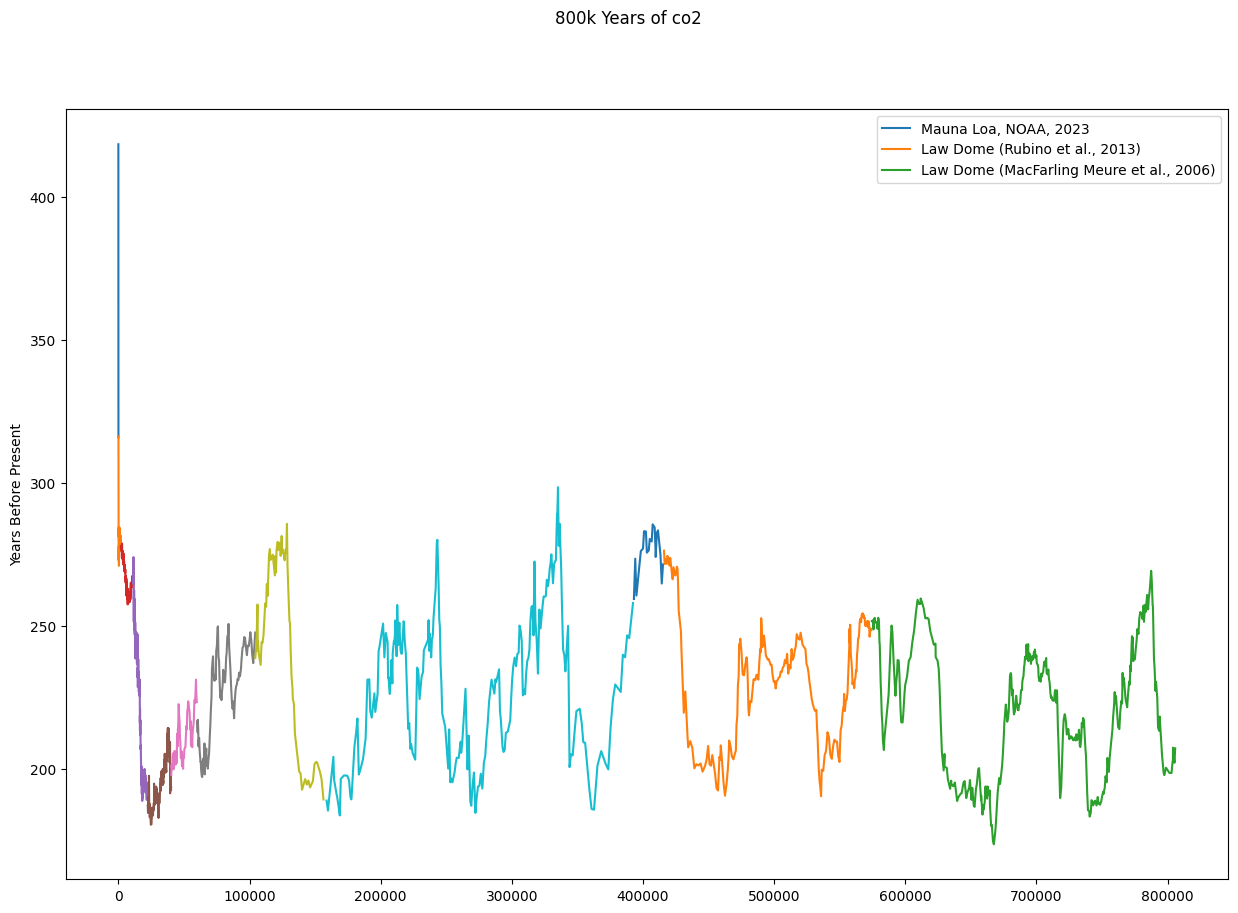

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(mauna_loa['years_before_present'], mauna_loa['co2_ppm'], label = 'Mauna Loa, NOAA, 2023')
ax.plot(rubino['years_before_present'], rubino['co2_ppmv'], label='Law Dome (Rubino et al., 2013)')
ax.plot(macfarling['years_before_present'], macfarling['co2_ppmv'], label = 'Law Dome (MacFarling Meure et al., 2006)')
ax.plot(monnin['years_before_present'], monnin['co2_ppmv'])
ax.plot(marcott['years_before_present'], marcott['co2_ppmv'])
ax.plot(ahn['years_before_present'], ahn['co2_ppmv'])
ax.plot(bereiter['years_before_present'], bereiter['co2_ppmv'])
ax.plot(bereiter_2['years_before_present'], bereiter_2['co2_ppmv'])
ax.plot(schneider['years_before_present'], schneider['co2_ppmv'])
ax.plot(petit['years_before_present'], petit['co2_ppmv'])
ax.plot(siegenthaler['years_before_present'], siegenthaler['co2_ppmv'])
ax.plot(siegenthaler_2['years_before_present'], siegenthaler_2['co2_ppmv'])
ax.plot(bereiter_3['years_before_present'], bereiter_3['co2_ppmv'])
ax.set_ylabel('Co2 PPM')
ax.set_ylabel('Years Before Present')
ax.legend()
plt.suptitle("800k Years of co2")